In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier

from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [2]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("prima-indians-diabetes.csv",names=colnames)

In [3]:
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X =  prima_df.drop("outcome", axis=1)
y =  prima_df.pop("outcome")

In [5]:
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [6]:
Dt_model2=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)

In [7]:
Rf_model = RandomForestClassifier(n_estimators=57,criterion='entropy',random_state=0 )

In [8]:
bag_model=BaggingClassifier(n_estimators=10,random_state=0)##Fully grown decision tree

In [9]:
bag_model2=BaggingClassifier(n_estimators=10,random_state=0,base_estimator=Dt_model2)## Regularised decision tree

In [10]:
bag_model3=BaggingClassifier(n_estimators=15,random_state=0,base_estimator=Dt_model2)## Regularised decision tree

In [11]:
bag_model4=BaggingClassifier(n_estimators=5,random_state=0,base_estimator=Dt_model2)## Regularised decision tree

In [12]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('DT_Regularized',Dt_model2))
models.append(('RandomForest', Rf_model))
models.append(('Bagged_DT',bag_model))
models.append(('Bagged_Regularised1',bag_model2))
models.append(('Bagged_Regularised2',bag_model3))
models.append(('Bagged_Regularised3',bag_model4))

In [13]:
models

[('DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('DT_Regularized',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,


In [14]:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results,ddof=1))
    print(msg)

DecisionTree: 0.562904 (0.005514)
DT_Regularized: 0.647672 (0.006615)
RandomForest: 0.615247 (0.001233)
Bagged_DT: 0.522393 (0.007553)
Bagged_Regularised1: 0.595421 (0.000461)
Bagged_Regularised2: 0.567144 (0.001379)
Bagged_Regularised3: 0.584996 (0.006590)


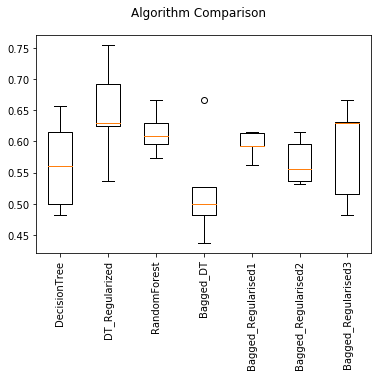

In [16]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()